In [2]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

# Loading audio files with Librosa    
출처 : https://www.youtube.com/watch?v=3gzI4Z2OFgY


In [3]:
file = '../../nmb_data/teamvoice/testvoice_F2.wav'

In [23]:
ipd.Audio(file)

In [4]:
# load audio files with librosa
scale, sr = librosa.load(file)
print(scale.shape)

(110250,)


# Extracting Short-Time Fourier Transform (STFT)

In [25]:
FRAME_SIZE = 2048
HOP_SIZE = 512

S_scale = librosa.stft(scale, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
print(S_scale.shape)    
print(type(S_scale[0][0]))

(1025, 216)
<class 'numpy.complex64'>


1025 = FRAM_SIZE / 2 +    
216 = (Samples - FRAM_SIZE) / HOP_SIZE + 1 (근데 값 안나옴)   
<class 'numpy.complex64'> : 퓨리에 변환을 거쳤을 때 컴플렉스한 모양이 나온다.

# Calculating the spectrogram
spectrogram = |STFT|^2

In [26]:
Y_scale = np.abs(S_scale) ** 2
print(Y_scale.shape)
print(type(Y_scale[0][0]))

(1025, 216)
<class 'numpy.float32'>


# Visualizing the spectrogram


In [27]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y,                     # spectogram
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time",         
                             y_axis=y_axis)      
    plt.colorbar(format="%+2.f")

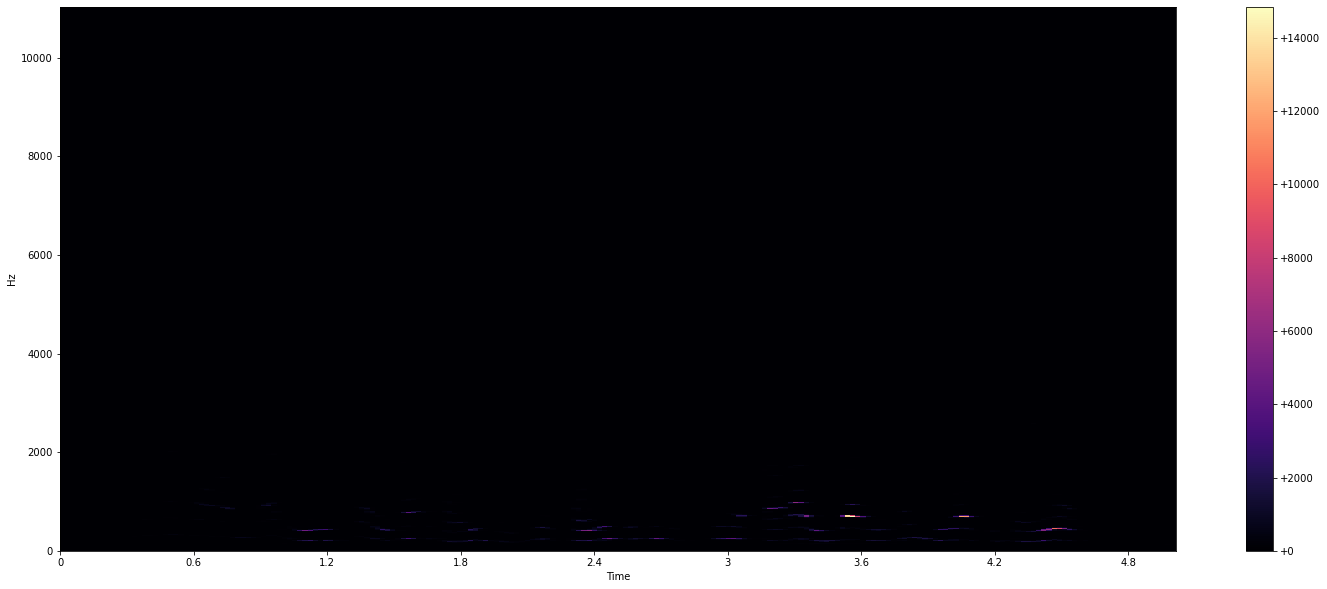

In [28]:
plot_spectrogram(Y_scale, sr, HOP_SIZE)

# 문제점 : 아래 그래프로는 특징을 찾을 수 없다.
# 실제 데이터들이 linear하지 않다. >> log 스케일이 직관적으로 보기 더 좋다.

# Log-Amplitude Spectrogram

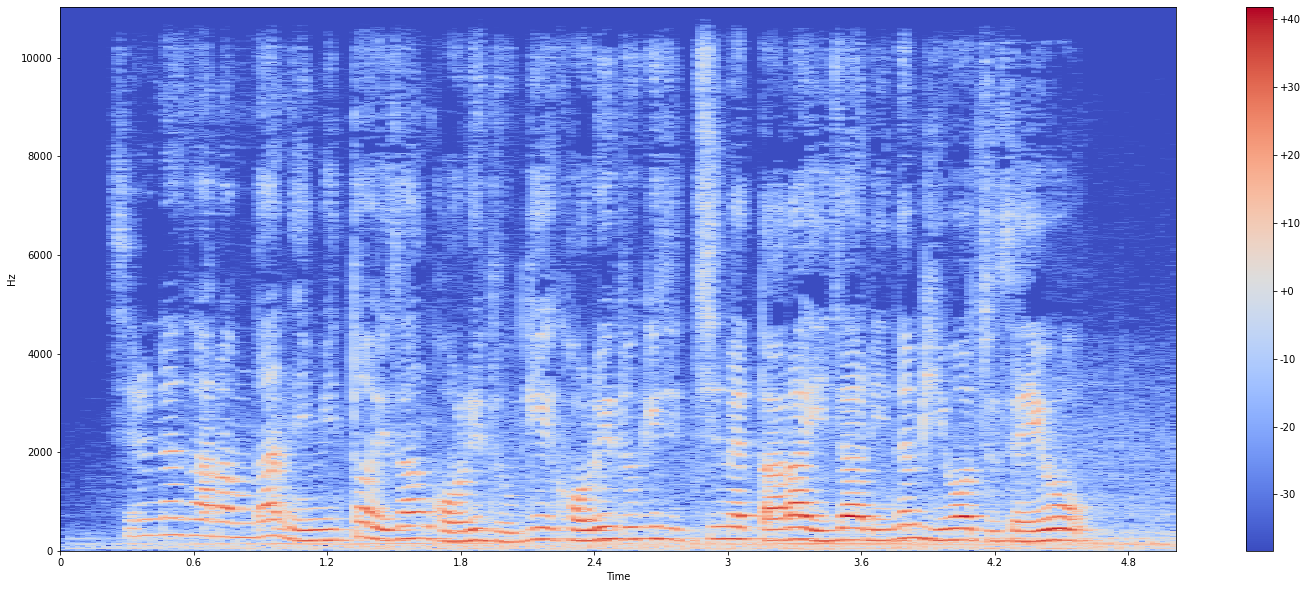

In [29]:
Y_log_scale = librosa.power_to_db(Y_scale)      # power_to_db : intensity -> db
plot_spectrogram(Y_log_scale, sr, HOP_SIZE)

하지만, 소리는 linear 이 아닌 log scale이 더 잘 적용된다.

# Log-Frequency Spectrogram

C:\Users\nammr\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


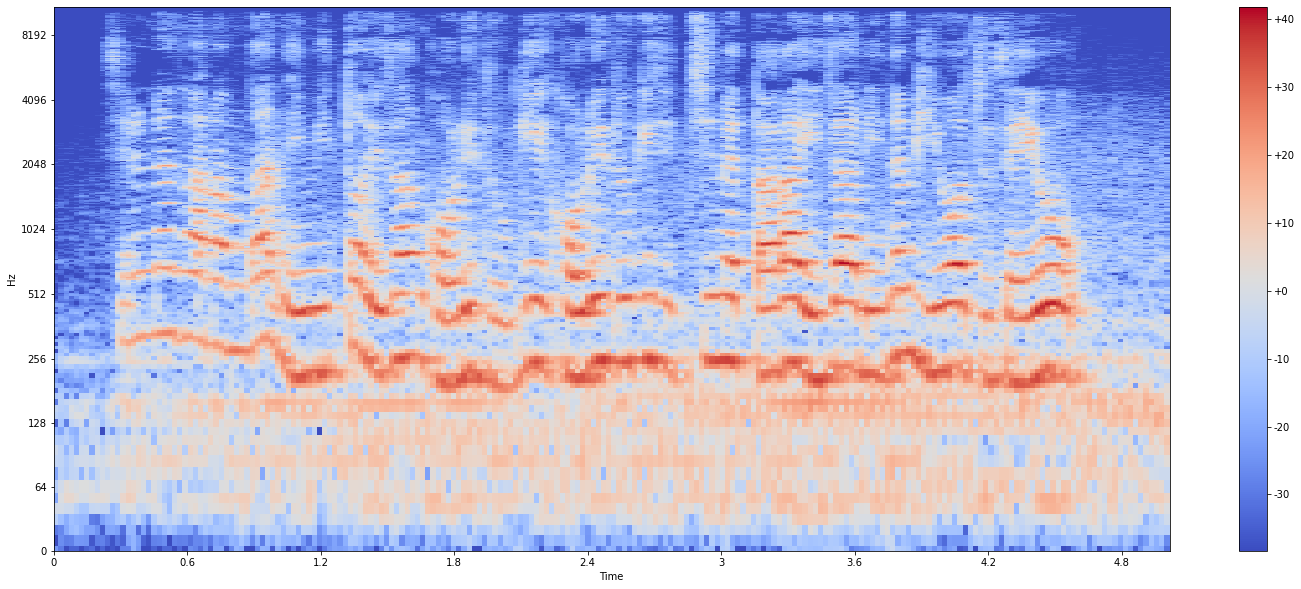

In [11]:
plot_spectrogram(Y_log_scale, sr, HOP_SIZE, y_axis="log")